In [1]:
%matplotlib inline

# Principal Components in Textual Analysis
Author: Patrick Sullivan

1. Problem: How to visualize differences among texts
2. Math: Use Principal Component Analysis to reduce dimensionality
3. Code
4. Conclusions

## Problem

We would like to understand mutliple bodies of texts numerically and find a way to represent them that emphasizes the relevant differences. In particular, we seek a method that transforms the texts into a simple, 2-dimensional plot where we can see similar texts grouped together and different ones separately. 

The first step is to represent each text as a vector of numbers. This vector will almost necessarily contain _many_ dimensions.

### High Dimensionality
There are two ways of representing each text numerically that I investigated. In _either_ case, the numeric representation of a text can have many hundreds or thousands of variables.

| Option | Description | Advantages | Disadvantages |
|--------|------------|---------------|---------------|
|Ngram frequency|$v_j$ is the frequency of occurrences of a particular word or sequence of words|Non-parametric|Loses context|
|Dictionary tagging|$v_j$ is the frequency of occurrences of a particular _set_ of words, usually chosen to have business meaning|Provides more business meaning|Parametric, requires a "good" dictionary to exist|

### Dimensionality Reduction
We seek a way to reduce the many variables associated to a text to 2 or 3 significant variables that explain the key dimensions along which the text varies. 

If $A$ is our original matrix:

|Text|$v_1$|$\ldots$|$v_j$|$\ldots$|$v_n$|
|--|--|--|--|--|
|Text 1|5|...|100|...|9|
|...|...|...|...|...|...|
|Text m|10|...|87|...|3|

We seek a "narrower" version, perhaps with just 3 variables: 

|Text|$v'_1$|$v'_2$|$v'_3$|
|--|--|--|--|--|
|Text 1|5|34|100|
|...|...|...|...|
|Text m|10|47|87|


### Data Set: Shakespeare and other authors

Our texts for this analysis are be the plays and sonnets of William Shakespeare.  His work is a good subject for this analysis. His plays vary widely from each other but return to the same themes, sometimes even with the same characters. The plays are traditionally grouped into three genres: 

* Comedies
* Histories
* Tragedies.

We will add to this data set the sonnets (treated as a single work) _and_ 2 texts by other authors: _Pride_ _and_ _Prejudice_ and _Leviathan_.  

Our question is whether we can reduce a high-dimensional representation of these texts to something that is easily plotted and visualized.

## Math
A very simple, intuitive, and popular method of dimensionality reduction is Principal Component Analysis. 

### Principal Component Analysis (PCA)
PCA creates new combinations of the variables in a way that represent most of the variance in the data. In particular, it is helpful to reduce a set of many variables into the key variables or combinations of variables that is most responsible for variances among texts. 

### PCA Motivation
#### Subtract the mean of each variable ####
Let $A$ be the complete matrix of the samples and their features where we have standardized each vector of observations by subtracting its sample mean. Therefore, we assume that each column of the matrix $A$ has mean 0.
$$
A = \begin{bmatrix} 
\vdots & \vdots &  \vdots & \vdots  & \vdots \\
\mathbf{v_1} & \ldots & \mathbf{v_j} & \ldots &  \mathbf{v_n}  \\
\vdots & \vdots &  \vdots & \vdots &  \vdots 
\end{bmatrix}
$$ 

#### Find the covariance matrix of A by calculating $A^TA$ ####
Note that one way to view each vector $\mathbf{v_j}$ is as samples of a random variable $V_j$. Then the sample covariance of two variables $V_j$ and $V_k$ is: 
$$
cov(V_j,V_k) = \frac{1}{m-1} \sum_{i=1}^m (v_{j,i} - \bar{v_j})(v_{k,i} - \bar{v_k})
$$

Note that since we have subtracted by the means, then $\bar{v_j} = 0$.  Therefore, this is equivalent to the vector formulation: 
$$
cov(V_j,V_k) = \frac{1}{m-1} \mathbf{v_j}^T \mathbf{v_k}
$$

Finally, note that $A^TA$ is the matrix of covariances (after dividing by $m-1$)! The diagonal of this matrix is made up of variances of each $v_j$ and the off-diagonal entries are the "cross-covariances" between each pair of variables.

$$
\frac{1}{m-1}\mathbf{A}^T \mathbf{A} = \frac{1}{m-1}\begin{bmatrix}
\mathbf{v_1}^T \mathbf{v_1} & & \vdots &   & \mathbf{v_n}^T \mathbf{v_1} \\
\vdots & \ddots &  \vdots &  & \vdots  \\
\mathbf{v_1}^T \mathbf{v_j} &  & \mathbf{v_j}^T \mathbf{v_j} &   &  \mathbf{v_n}^T \mathbf{v_j}  \\
\vdots &  & \vdots  & \ddots & \vdots  \\
\mathbf{v_1}^T \mathbf{v_n} &  & \vdots  &  & \mathbf{v_n}^T \mathbf{v_n} 
\end{bmatrix}
$$

#### Can we eliminate correlations between variables? ####
Now that we know how to represent the covariances of our variables, we wish to find a transformation of the matrix $A$ into new variables that have no correlation with each other. 

In linear algebra terms, this means that the off-diagonal entries of the covariance matrix are reduced to zero.  

This allows us to represent our samples in terms of $n$ variables with _no_ _cross-correlations_ _among_ _the_ _variables_!  

In some sense, each of these new variables will explain a distinct driver of the variance in the data set and they aren't "polluted" by interaction with other variables.

Is such a transformation possible?

#### Calculate eigenvectors of $A^TA$ ####
The answer is yes! 

This is where eigenvalues and eigenvectors appear. This theorem is the key fact we use.

**Theorem** For any $m\times n$ matrix, $A$, there exists a matrix $P$ such that $(AP)^T(AP)$ is a diagonal matrix.

**Proof** We prove it by construction. Let $P$ be the matrix $S$ of eigenvectors of $A^TA$, where the eigenvectors are arranged in columns. Then, 
$$
(AS)^T(AS) = S^T (A^T A) S
$$
Recall that $A^TA$ is a symmetric matrix. Therefore, we know that if $S$ is the matrix of eigenvectors of $A^TA$ and $\Lambda$ the matrix of eigenvalues, then 
$$
\Lambda = S^T (A^T A) S
$$
Therefore, $S$ is the matrix we seek.

[A Tutorial On Principal Component Analysis](http://www.cs.cmu.edu/~elaw/papers/pca.pdf)

### PCA Procedure
1. Standardize each vector of observations to have mean 0.  Call the matrix of standardized observations, $A$.
2. Diagonalize the covariance matrix $A^TA = S \Lambda S^T$. $S$ is the matrix whose columns are the eigenvectors of $A^TA$ and $\Lambda$ is a diagonal matrix with the eigenvalues of $A^TA$ on the diagonal. Organize the eigenvectors of $A^TA$ from largest to smallest and rank the corresponding eigenvectors. These are your principal components.
3. Transform $A$ to the new basis provided by calculating $AS$. 

### PCA Connection to SVD
In practice, the diagonalization of $A^TA$ is usually done with Singular Value Decomposition. In the SVD form of $A$, 
$$
\mathbf{A} = \mathbf{U} \mathbf{D} \mathbf{V}^T
$$
where $V$ is the matrix of eigenvectors of $A^TA$. Therefore
$$
\mathbf{AV} = \mathbf{U}\mathbf{D}\mathbf{V}^T\mathbf{V} = \mathbf{U}\mathbf{D}
$$
Hence the rows of $\mathbf{UD}$ represent the rows of $\mathbf{A}$ after transformation into the principal component space.

## Code
### Download the data
I am using two main sources for the raw text files. The Shakespeare works come from [Folger Digital Texts][folger], and I downloaded a few other texts for comparison purposes from [Project Gutenberg][gutenberg]
* Plays: [Folger Digital Texts][folger]
 * The Folger Digital Text library provides an API that gives "stripped" versions of the play. All of the stage directions, character names, and other non-spoken material are removed. The only text left is that spoken by characters in the play. I only did some minor cleaning to remove html tags.
* Sonnets: [Folger Digital Texts][folger]
 * I did some minor cleaning to remove headings and other introductory material.
* Pride and Prejudice: [Project Gutenberg][gutenberg-PandP]
 * The Project Gutenberg text has detailed disclaimers and other legal statements at the start and end of the text. I removed this material.
* Leviathan: [Project Gutenberg][gutenberg-Leviathan]
 * This required similar cleaning as the Pride and Prejudice text.

[folger]: http://www.folgerdigitaltexts.org
[gutenberg]: http://www.gutenberg.org
[gutenberg-PandP]: http://www.gutenberg.org/files/1342/1342-0.txt
[gutenberg-Leviathan]: http://www.gutenberg.org/cache/epub/3207/pg3207.txt


In [3]:
%%capture
import download

download.shakespeare_plays("textMetadata.csv"); 
download.shakespeare_sonnets(); 
download.gutenberg_texts([('Pride and Prejudice', 'http://www.gutenberg.org/files/1342/1342-0.txt'),
                      ('Leviathan', 'http://www.gutenberg.org/cache/epub/3207/pg3207.txt')]
                     );

0

### Dictionary Tagging: Tag data with categories
[Docuscope] is a dictionary of words grouped by "Language Action Types" (LATs). There are mutliple versions. I used the open source one available on
[GitHub][gh Docuscope].

[Ubiqu-Ity][Ubiqu] is an academic tool for parsing texts that is specially written to work with Docuscope. It creates a vector for each text with the frequency of words used in each category. The source code is available from [GitHub][gh Ubiqu] under the BSD License. 

I executed the Docuscope tagging library through a shell script. If you are running this notebook yourself, you will need to make sure tha tyou have the Ubiqu-Ity scripts and Docuscope libraries in the right places. You may need to change path names.

[Docuscope]:http://www.cmu.edu/dietrich/english/research/docuscope.html
[gh Docuscope]:https://github.com/docuscope/DocuScope-Dictionary-June-26-2012
[Ubiqu]:http://vep.cs.wisc.edu/ubiq/
[gh Ubiqu]:https://github.com/uwgraphics/Ubiqu-Ity

In [5]:
%%bash
( cd ../Ubiqu-Ity-master && python ~/msca/Ubiqu-Ity-master/Ubiqu/tagCorpus.py --ngram_per_doc --ngram_count 1 --docuscope_version default ~/msca/shakespca/data ~/msca/shakespca/data_tagged )

Tagging corpus data...
Starting tag_corpus...
tag_corpus finished. Total elapsed time: 413.41 seconds.


### Word Frequency
Word frequency is usually analyzed through "n-grams". An n-gram is a sequence of $n$ words. For example, for $n=2$, the line "to be or not to be" is made up of the n-grams: to be, be or, or not, not to, to be. The Ubiqu+Ity utility also count n-grams. For my analysis, I just counted 1-grams, which means I just counted usages of individual words.  

### Load tagged data
I wrote a few Python functions to load the tagged data and clean it properly. First we use the pandas module and represent the data as a dataframe.  Each row represents a play and the columns are categories of words. The numbers represent the share of the words in that play that fall in a given category. Note that the same words can appear in multiple categories.

In [86]:
import cleanTaggedData
import getTextMetadata
import pandas as pd

A_tg, A_md = cleanTaggedData.get_tagged_texts()
md =  getTextMetadata.main()
justPlays = list(md.query('First_Folio_category != "Other"').index)
justShak = list(md.index[md['Shakespeare']])
justPlays_tg = A_tg.loc[ justPlays ]
justShak_tg = A_tg.loc[ justShak ]
A_tg.iloc[:,0:5].head()

,AbstractConcepts,Acknowledge,Anger,Apology,Aside
text_key,,,,,
1h4,2.382702,0.045485,0.230923,0.006998,0.216927
1h6,2.323764,0.024677,0.357819,0.008226,0.164514
2h4,2.203483,0.054926,0.145391,0.012924,0.242319
2h6,2.385428,0.123031,0.310994,0.006835,0.105943
3h6,2.015839,0.068395,0.295176,0.014399,0.140389


### Load ngram data
A second function loads a dataframe where each row is a play and each column the number of a given ngram used in that play. For efficiency, we are only using 1000 most frequently used words throughout the texts.

In [87]:
A_ng = cleanTaggedData.get_ngrams()
justPlays_ng = A_ng.loc[justPlays]
justShak_ng = A_ng.loc[justShak]
A_ng.iloc[:,0:5].head()

,all,consider,pardon,excellent,souls
1h4,0.689436,0.005303,0.042427,0.010607,0.000000
1h6,0.510699,0.000000,0.012929,0.006465,0.006465
2h4,0.480979,0.009717,0.019434,0.043725,0.014575
2h6,0.715517,0.005223,0.052228,0.005223,0.026114
3h6,0.431802,0.005398,0.064770,0.000000,0.000000


### PCA Analysis
#### Find Principal Components
Many libraries exist for doing PCA. For demonstration purposes, I have written my own for this project. 

In [88]:
import numpy as np
from collections import namedtuple


def Principal_Components(A):
    assert (isinstance(A, pd.DataFrame))

    # Standardize input by subtracting mean
    A_std = (A - A.mean(axis=0))

    # Calculate covariance matrix (without scaling by number of samples)
    covA = A_std.T.dot(A_std)

    # Calculate eigenvectors and values
    eig_val, eig_vec = np.linalg.eigh(covA)

    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(eig_val[i], eig_vec[:, i]) for i in range(len(eig_val))]

    #  Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    # Return ordered eigenvalue and eigenvectors
    eig_val = [i[0] for i in eig_pairs]
    eig_vec = np.asmatrix([i[1] for i in eig_pairs]).T

    # Return everything in a tuple with named elements
    res = namedtuple("PC_", ['A_std', 'covA', 'eig_val', 'eig_vec'])

    return res(A_std, covA, eig_val, eig_vec)

#### Transform data
After finding the principal components we can transform the data into principal component space of any dimension we choose by selecting the top n eigenvectors of the covariance matrix.

In [89]:
def PC_Transform(inp, n_components):
    PC_inp = Principal_Components(inp)
    topneigv = PC_inp.eig_vec[:, range(0, n_components)]

    return inp.dot(topneigv)

#### Plot transformed data
The plotting code colors points by their category (History, Comedy, Tragedy, or Other) and labels the points.

In [136]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-darkgrid')

def plot_PCA(Y, md_, title_, p, fig_):

    fig_.add_subplot(1,2,p)
    for lab, col in zip( md_['First_Folio_category'].unique(),
                        ('blue', 'red', 'green', 'orange')):
        txts = md_['First_Folio_category'] == lab
        plt.scatter(Y.loc[txts,0], Y.loc[txts,1], label=lab, c=col, alpha = 0.4, s = 70)
    for pl in Y.index:
        plt.text(Y.loc[pl, 0]+0.1, Y.loc[pl, 1]+0.1, pl, fontsize = 18)
    plt.xlabel('Principal Component 1', fontsize = 14)
    plt.ylabel('Principal Component 2', fontsize = 14)
    plt.title(title_, fontsize = 20)

    return 0

## Analysis and Conclusions
I calculated 6 different decompositions using these functions. We show a 2-d plot in principal component space for each one.

|Data Set|Text representation|
|---------------|----------------|
|All Shakespeare plus non-shakespeare|dictionary tagging| 
|All Shakespeare plus non-shakespeare|1gram counting| 
|All Shakespeare works (plays and sonnets)|dictionary tagging| 
|All Shakespeare works (plays and sonnets)|1gram counting| 
|All Shakespeare Plays|dictionary tagging| 
|All Shakespeare Plays|1gram counting| 

A pure PCA model easily distinguishes between Shakespeare and other authors. It also recognizes the difference between the sonnets and the plays.  Within the plays, it identifies some Comedies as distinct but fails to clearly distinguish between Histories and Tragedies. 

### Shakespeare and Other Authors
The complete data set included two works by other authors, Leviathan by Thomas Hobbes, and Pride and Prejudice by Jane Austen. Qualitatively, one can see the difference between these works and Shakespeare's for both tagged texts and the ngram-counting method.

|Data Set|Text representation|
|---------------|----------------|
|All Shakespeare plus non-shakespeare|dictionary tagging| 
|All Shakespeare plus non-shakespeare|1gram counting| 

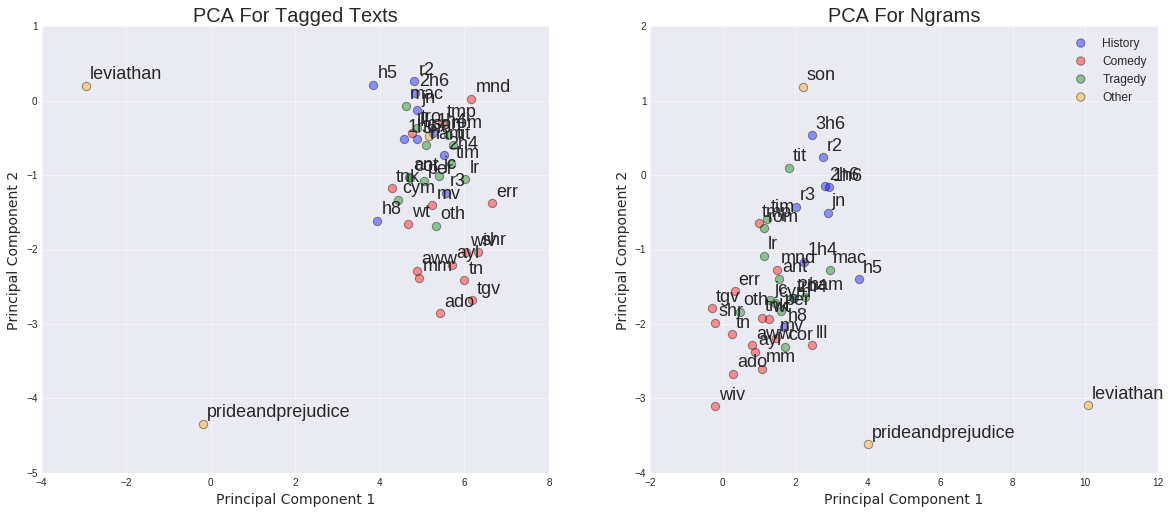

In [137]:
A_tg_pc = PC_Transform(A_tg,2)
A_ng_pc = PC_Transform(A_ng,2)
fig = plt.figure(figsize = (20,8))
plot_PCA(A_tg_pc, md, 'PCA For Tagged Texts', 1, fig)
plot_PCA(A_ng_pc, md, 'PCA For Ngrams', 2, fig)
plt.legend(loc='upper right')
plt.show()


### Shakespeare plays and other works
PCA also does a good job of distinguishing the sonnets.  The sonnets are in the lower right and lower left, respectively, of the two plots.

|Data Set|Text representation|
|---------------|----------------|
|All Shakespeare works|dictionary tagging| 
|All Shakespeare works|1gram counting| 



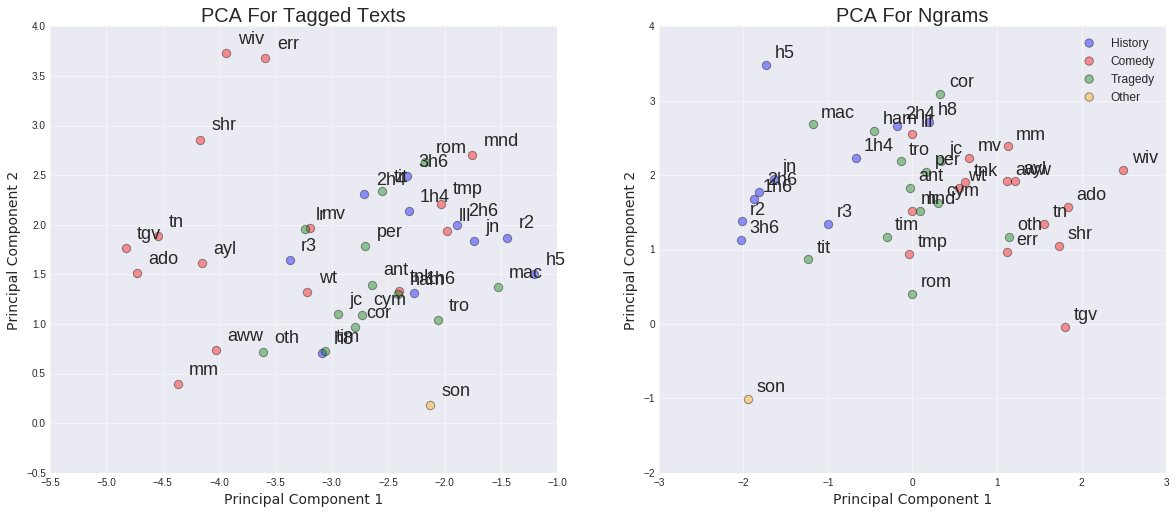

In [138]:
justShak_tg_pc = PC_Transform(justShak_tg,2)
justShak_ng_pc = PC_Transform(justShak_ng,2)
fig = plt.figure(figsize = (20,8))
plot_PCA(justShak_tg_pc, md, 'PCA For Tagged Texts', 1, fig)
plot_PCA(justShak_ng_pc, md, 'PCA For Ngrams', 2, fig)
plt.legend(loc='upper right')
plt.show()

### Shakespeare plays alone
The final step is to compare how well PCA distinguishes categories within the plays. The dictionary-tagging method does slightly better. The comedies are clustered in the lower-right part of the plot.

|Data Set|Text representation|
|---------------|----------------|
|All Shakespeare Plays|dictionary tagging| 
|All Shakespeare Plays|1gram counting| 


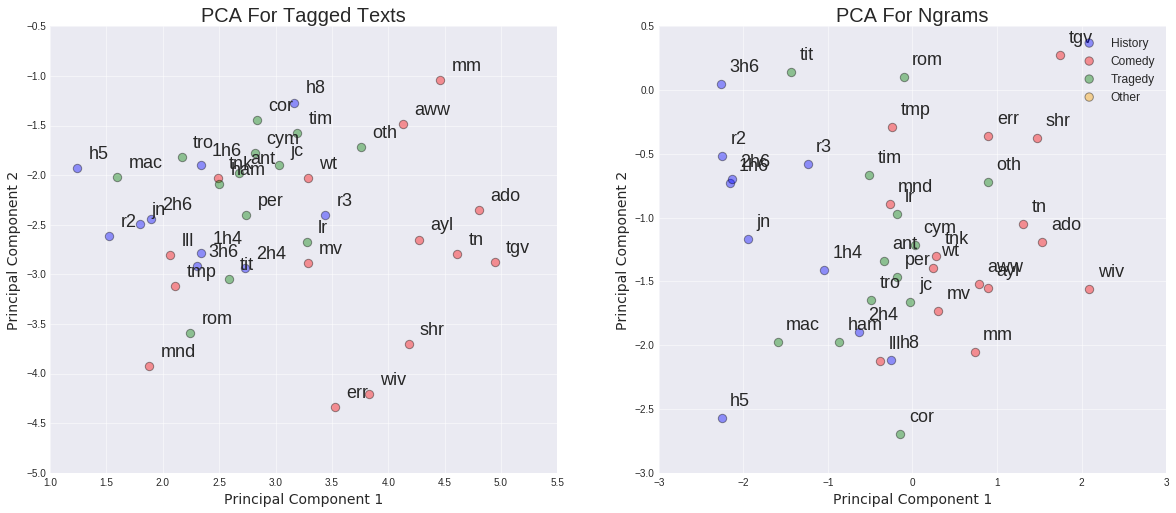

In [139]:
justPlays_tg_pc = PC_Transform(justPlays_tg,2)
justPlays_ng_pc = PC_Transform(justPlays_ng,2)
fig = plt.figure(figsize = (20,8))
plot_PCA(justPlays_tg_pc, md, 'PCA For Tagged Texts', 1, fig)
plot_PCA(justPlays_ng_pc, md, 'PCA For Ngrams', 2, fig)
plt.legend(loc='upper right')
plt.show()

# Appendix
All of the code used here and steps for downloading the data are available from this [GitHub][gh home] repository.

[gh home]:https://github.com/tpatricksullivan/shakespca

## Sources
[Wine Dark Sea](http://winedarksea.org/?p=2225)

[PCA in Three Steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

[A Tutorial On Principal Component Analysis](http://www.cs.cmu.edu/~elaw/papers/pca.pdf)

[Folger Shakespeare Library](http://www.folgerdigitaltexts.org)

[Project Gutenberg](http://www.gutenberg.org)

[Docuscope](http://www.cmu.edu/dietrich/english/research/docuscope.html)

[Docuscope Github](https://github.com/docuscope/DocuScope-Dictionary-June-26-2012)

[Ubiqu-Ity](http://vep.cs.wisc.edu/ubiq/)

[Ubiqu-Ity Github](https://github.com/uwgraphics/Ubiqu-Ity)